353 10


Text(0, 0.5, 'Prediction')

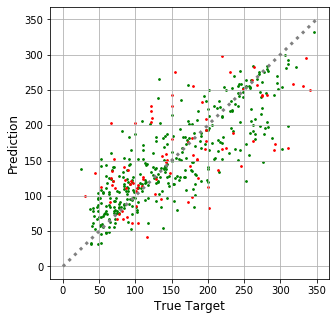

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

def gaussian(x, u, sigma):
    return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma))


diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

N,p = X.shape
M = 111

means, stds = [],[]
for j in range(p):
    col = X[:,j]
    means.append(np.mean(col))
    stds.append(np.std(col))
    for i in range(N):
        X[i,j] = (X[i,j]-means[j])/stds[j]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        
N, p = X_train.shape
print(N, p)

        
# Space for design matrix
U = np.zeros((N,M))
U_test = np.zeros((N,M))

# Basis function locations at random
C = np.random.randn(M,p)
kmeans = KMeans(init='k-means++', n_clusters=M)
kmeans.fit(X_train)
C = kmeans.cluster_centers_

# Basis function range as distance between two random data
sigmas = []
for i in range(100):
    x1 = X_train[np.floor(np.random.rand()*N).astype(int),:]
    x2 = X_train[np.floor(np.random.rand()*N).astype(int),:]
    sigmas.append(np.linalg.norm(x1-x2))
sigma = np.mean(sigmas)



# Construct the design matrix
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(X_train[i,:], C[j,:], sigma)
        # X[i,:] is i-th row of X
        # C[j,:] is j-th row of C
for i in range(X_test.shape[0]):
    for j in range(M):
        U_test[i,j] = gaussian(X_test[i,:], C[j,:], sigma)

    
# Pseudo inverse solution for linear part
l = np.linalg.inv(U.T @ U) @ U.T @ y_train

# Predicted values on training data
yh_train = U @ l
yh_test = U_test @ l
yh_test = yh_test[:len(y_test)]
    
fig, ax = plt.subplots(figsize=(5,5))
lin = np.linspace(0,350)
ax.plot(lin,lin,c="grey",linestyle=":",linewidth=3)
ax.scatter(y_train, yh_train, c="g", s=3)
ax.scatter(y_test, yh_test, c="r", s=3)

ax.grid(True)
#ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)


Iteration  0
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
0 0
Iteration  1
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
0 1
Iteration  2
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
0 2
Iteration  3
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
0 3
Iteration  4
X_train shape:  (397, 10)
X_test shape:  (45, 10)
y_train shape:  (397,)
y_test shape:  (45,)
0 4
Iteration  5
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
1 0
Iteration  6
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
1 1
Iteration  7
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
1 2
Iteration  8
X_train shape:  (398, 10)
X_test shape:  (44, 10)
y_train shape:  (398,)
y_test shape:  (44,)
1 3
I

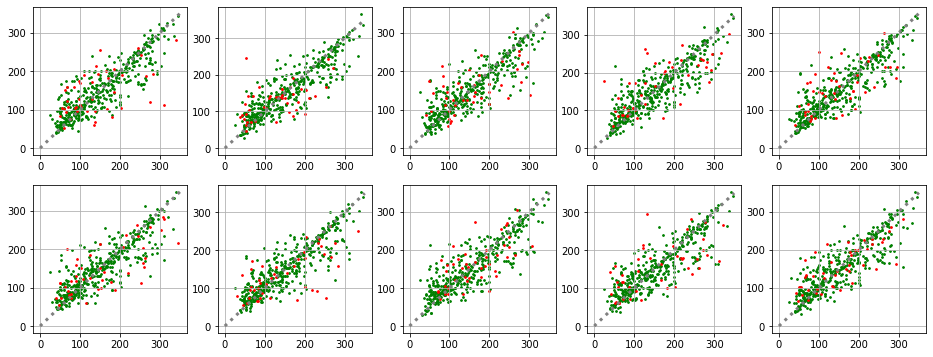

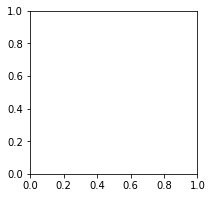

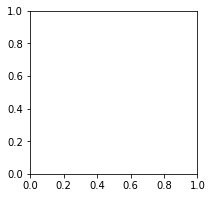

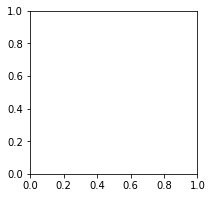

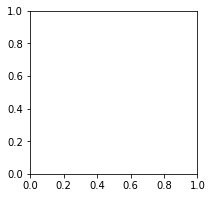

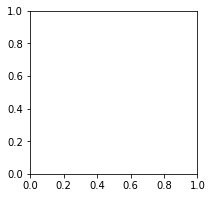

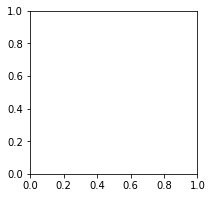

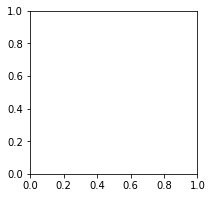

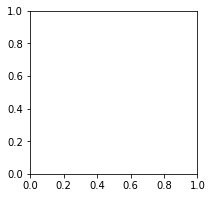

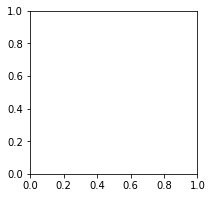

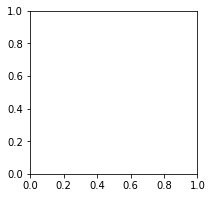

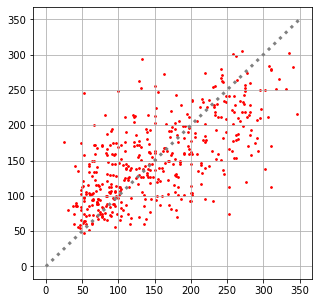

In [41]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

dosort = True

N,p = X.shape
M = 200

means, stds = [],[]
for j in range(p):
    col = X[:,j]
    means.append(np.mean(col))
    stds.append(np.std(col))
    for i in range(N):
        X[i,j] = (X[i,j]-means[j])/stds[j]
        
if False:  
    indices = np.argsort(y)
    xsorted = np.zeros((N,p))
    for i,j in zip(indices,range(N)):
        xsorted[i] = X[j]
    X = xsorted
    y = np.sort(y)
        
xwidth = X.shape[0]/10
ywidth = y.shape[0]/10

fig, axs = plt.subplots(2, 5,figsize=(16,6))

final3 = []
final4 = []

for iter in range(10):
    print("Iteration ", iter)
    X_test = X[int(iter*xwidth):int((iter+1)*xwidth),:]
    #X_train = X - X_test
    y_test = y[int(iter*ywidth):int((iter+1)*ywidth)]
    if iter == 0:
        X_train = X[int((iter+1)*xwidth):,:]
        y_train = y[int((iter+1)*ywidth):]
    elif iter == 9:
        X_train = X[:int(iter*xwidth),:]
        y_train =  y[:int(iter*ywidth)]
    else:
        X_train = np.concatenate((X[int((iter+1)*xwidth):,:], X[:int(iter*xwidth),:]))
        y_train = np.concatenate((y[int((iter+1)*ywidth):], y[:int(iter*ywidth)]))
    N, p = X_train.shape
    print("X_train shape: ", X_train.shape)
    print("X_test shape: ", X_test.shape)
    print("y_train shape: ", y_train.shape)
    print("y_test shape: ", y_test.shape)


    # Space for design matrix
    U = np.zeros((N,M))
    U_test = np.zeros((N,M))

    # Basis function locations at random
    #C = np.random.randn(M,p)
    kmeans = KMeans(init='k-means++', n_clusters=M)
    kmeans.fit(X_train)
    C = kmeans.cluster_centers_

    # Basis function range as distance between two random data
    sigmas = []
    for i in range(10):
        x1 = X_train[np.floor(np.random.rand()*N).astype(int),:]
        x2 = X_train[np.floor(np.random.rand()*N).astype(int),:]
        sigmas.append(np.linalg.norm(x1-x2))
    sigma = np.mean(sigmas)

    # Construct the design matrix
    for i in range(N):
        for j in range(M):
            U[i,j] = gaussian(X_train[i,:], C[j,:], sigma)
            # X[i,:] is i-th row of X
            # C[j,:] is j-th row of C
    for i in range(X_test.shape[0]):
        for j in range(M):
            U_test[i,j] = gaussian(X_test[i,:], C[j,:], sigma)
    
    # Pseudo inverse solution for linear part
    l = np.linalg.inv(U.T @ U) @ U.T
    l = l @ y_train

    # Predicted values on training data
    yh_train = U @ l
    yh_test = U_test @ l
    yh_test = yh_test[:len(y_test)]

    fig, ax = plt.subplots(figsize=(3,3))
    lin = np.linspace(0,350)
    a=int(np.floor(iter/5))
    b=iter % 5
    print(a,b)
    axs[a,b].plot(lin,lin,c="grey",linestyle=":",linewidth=3)
    axs[a,b].scatter(y_train, yh_train, c="g", s=3)
    axs[a,b].scatter(y_test, yh_test, c="r", s=3)

    axs[a,b].grid(True)
    
    if iter == 0:
        final1 = y_test
        final2 = yh_test
    else:
        final1 = np.concatenate((final1,y_test))
        final2 = np.concatenate((final2,yh_test))
        #np.resize(final2,(final1.shape[0],1))
        #print(final1.shape,final2.shape)
    final3.append(y_test)
    final4.append(yh_test)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(True)
print(final1.shape)
print(final2.shape)
plt.plot(lin,lin,c="grey",linestyle=":",linewidth=3)
plt.scatter(final1, final2, c="r", s=3)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

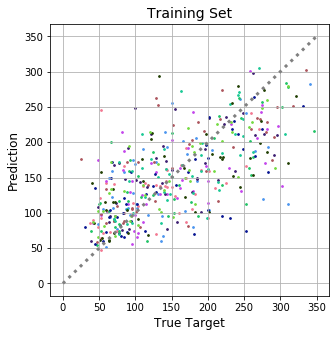

In [43]:
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

plt.plot(lin,lin,c="grey",linestyle=":",linewidth=3)
for i in range(len(final3)):
    plt.scatter(final3[i], final4[i], c=np.random.rand(3,), s=3)

